# Hypothesis testing


- Titanic dataset https://www.openml.org/d/40945


In [136]:
import pandas as pd
import scipy.stats
import seaborn as sns

In [137]:
titanic = pd.read_csv("https://www.openml.org/data/get_csv/16826755/phpMYEkMl")

In [138]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [139]:
titanic.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


## Chi2 and Fisher exact test

http://www.biostathandbook.com/fishers.html ("Fisher's exact test is more accurate than the chi-square test or G–test of independence when the expected numbers are small. I recommend you use Fisher's exact test when the total sample size is less than 1000, and use the chi-square or G–test for larger sample sizes.")


In [140]:
# Have significantly more women survived than man
titanic.groupby(["survived", "sex"]).size()

survived  sex   
0         female    127
          male      682
1         female    339
          male      161
dtype: int64

In [129]:
scipy.stats.fisher_exact([[127, 682], [339, 161]])

(0.08843934636112769, 7.918168863516975e-83)

In [130]:
scipy.stats.chi2_contingency([[127, 682], [339, 161]])

(363.6179084388249,
 4.589924936952945e-81,
 1,
 array([[288.00152788, 520.99847212],
        [177.99847212, 322.00152788]]))

In [144]:
# Are survivial and passanger class linked?
titanic.groupby(["survived", "pclass"]).size()

survived  pclass
0         1         123
          2         158
          3         528
1         1         200
          2         119
          3         181
dtype: int64

In [145]:
scipy.stats.fisher_exact([[123, 158], [200, 119]])

(0.46319620253164556, 4.12636960926545e-06)

## t-test

In [146]:
# as some ages are unknown we have to clean the table
titanic_age_clean = titanic[titanic.age != "?"]

In [148]:
pd.options.mode.chained_assignment = None # turn of a warning
titanic_age_clean["age"] = titanic_age_clean.age.astype(float)

In [149]:
titanic_age_clean["age"]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

In [151]:
titanic_age_clean["age"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

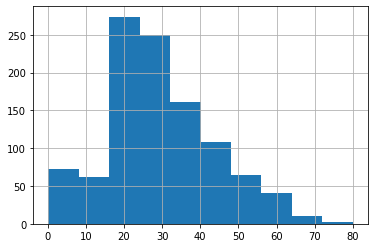

In [29]:
titanic_age_clean["age"].hist()

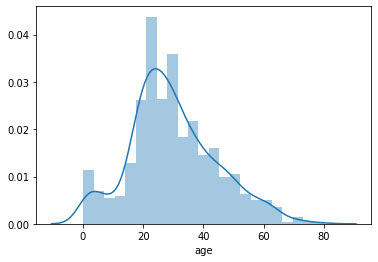

In [163]:
sns.distplot(titanic_age_clean.age)

In [159]:
# One sided test  - Einstichtest

# Hypothesis: We have read that at that time the average age of
# passenger of such trips was 32 year. Is the average age of the 
# Titanic passenger significantly different from this?
scipy.stats.ttest_1samp(titanic_age_clean.age, 32)

Ttest_1sampResult(statistic=-4.754444542886998, pvalue=2.2685268503517145e-06)

In [161]:
scipy.stats.ttest_1samp(titanic_age_clean["age"][:-1], 32)

Ttest_1sampResult(statistic=-4.748015312694617, pvalue=2.3405354970886003e-06)

In [98]:
titanic_age_clean["age"].mean()

29.8811345124283

In [ ]:
# independend two sample test

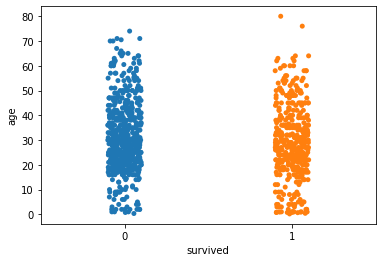

In [33]:
# Hypothesis - Is the average age of the survivors different 
# from the average age of the people who died?
sns.stripplot(data=titanic_age_clean, y="age", x="survived")

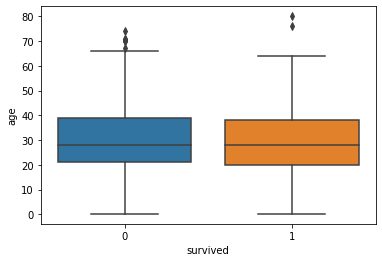

In [34]:
sns.boxplot(data=titanic_age_clean, y="age", x="survived")

In [39]:
ages_surived = titanic_age_clean[titanic_age_clean.survived == 1]["age"]
ages_died = ages_surived = titanic_age_clean[titanic_age_clean.survived == 0]["age"]

In [38]:
scipy.stats.ttest_ind(ages_surived, ages_died)

Ttest_indResult(statistic=0.0, pvalue=1.0)

=> No significant difference.

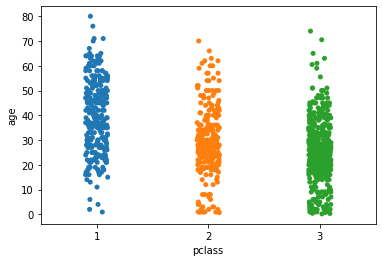

In [162]:
# Is the average age of people in the fist class higher
# than in the 2nd class and 3rd class

sns.stripplot(data=titanic_age_clean, y="age", x="pclass")

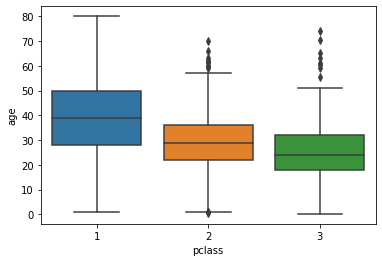

In [54]:
sns.boxplot(data=titanic_age_clean, y="age", x="pclass")

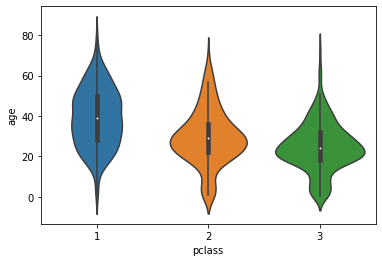

In [56]:
sns.violinplot(data=titanic_age_clean, y="age", x="pclass")

In [58]:
ages_pclass_1 = titanic_age_clean[titanic_age_clean.pclass == 1]["age"]
ages_pclass_2 = titanic_age_clean[titanic_age_clean.pclass == 2]["age"]
ages_pclass_3 = titanic_age_clean[titanic_age_clean.pclass == 3]["age"]

In [59]:
scipy.stats.ttest_ind(ages_pclass_1, ages_pclass_2)

Ttest_indResult(statistic=7.9729859094291875, pvalue=9.201788540944594e-15)

In [60]:
scipy.stats.ttest_ind(ages_pclass_2, ages_pclass_3)

Ttest_indResult(statistic=4.892501235993153, pvalue=1.215896702202247e-06)